In [77]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from IPython.display import SVG, HTML, display
from graphviz import Source
from IPython.display import display

In [6]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [7]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [8]:
# сколько пропущенных данных в каждой колонке
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Удалим ненужные столбцы
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
# Данные, которые необходимо предсказать
Y = titanic_data.Survived

In [10]:
# Переведем все строковые данные в числовые
X = pd.get_dummies(X)
# Зполним пустые значения (в данном случае значеним медианного возраста всех пассажиров)
X = X.fillna({'Age': X.Age.median()})

In [11]:
# Создадим классификатор дерева решения
clf = tree.DecisionTreeClassifier(criterion='entropy')
# Запустим обучение
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

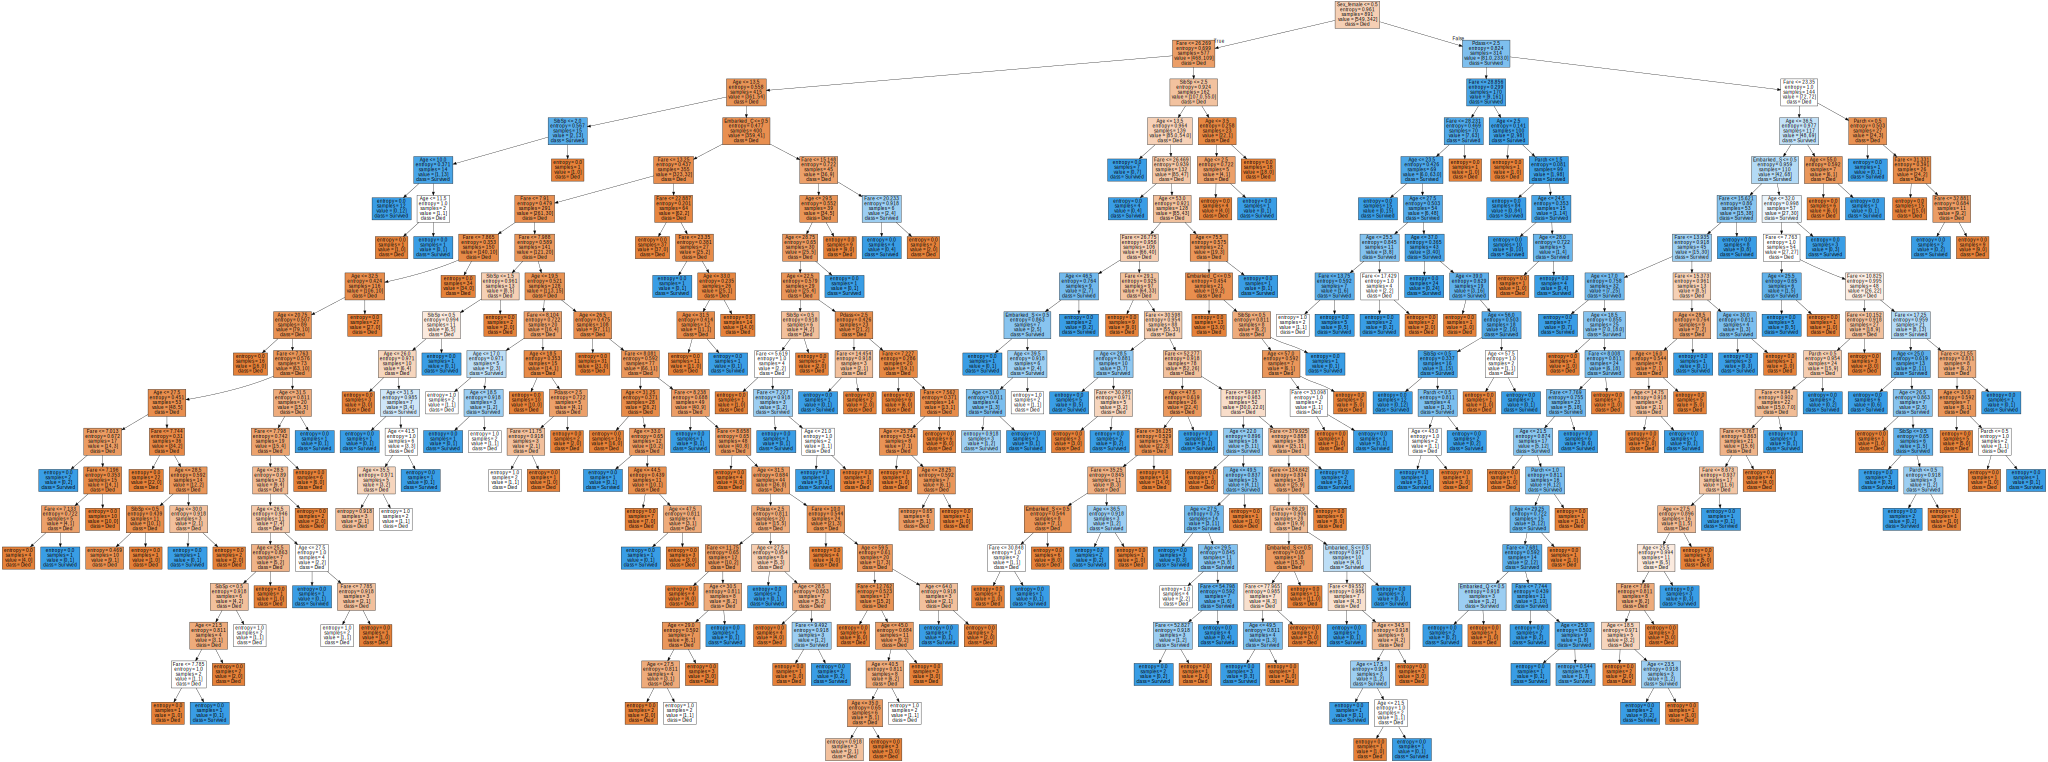

In [12]:
graph = Source(tree.export_graphviz(clf, out_file=None
              ,feature_names=list(X), class_names=['Died', 'Survived']
              ,filled = True))

display(SVG(graph.pipe(format='svg')))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
clf.score(X, Y)

0.7867564534231201

In [31]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [32]:
clf.score(X_train, Y_train)

0.7818791946308725

In [33]:
clf.score(X_test, Y_test)

0.7966101694915254

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
clf.score(X_train, Y_train)

0.8406040268456376

In [37]:
clf.score(X_test, Y_test)

0.8067796610169492

In [38]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [39]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

<Axes: xlabel='max_depth', ylabel='score'>

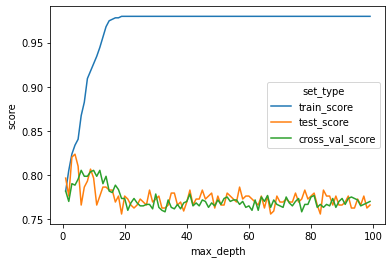

In [40]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                                                var_name='set_type', value_name='score')
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
cross_val_score(clf, X_test, Y_test, cv=5).mean()

0.7932203389830509

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
clf = tree.DecisionTreeClassifier()

In [52]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [53]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [54]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [61]:
grid_search_cv_clf.fit(X_train, Y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [64]:
best_clf = grid_search_cv_clf.best_estimator_

In [65]:
best_clf.score(X_test, Y_test)

0.7728813559322034

In [70]:
from sklearn.metrics import precision_score, recall_score

In [68]:
y_pred = best_clf.predict(X_test)

In [69]:
precision_score(Y_test, y_pred)

0.7789473684210526

In [71]:
recall_score(Y_test, y_pred)

0.6166666666666667

In [75]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [0.        , 1.        ],
       [0.59259259, 0.40740741],
       [1.        , 0.        ],
       [0.35714286, 0.64285714],
       [0.86734694, 0.13265306],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.93243243, 0.06756757],
       [1.        , 0.        ],
       [0.86734694, 0.13265306],
       [0.93243243, 0.06756757],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.59259259, 0.40740741],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.86734694, 0.13265306],
       [0.65384615, 0.34615385],
       [0.59259259, 0.40740741],
       [0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.65384615, 0.34615385],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.59259259, 0.40740741],
       [0.

<Axes: >

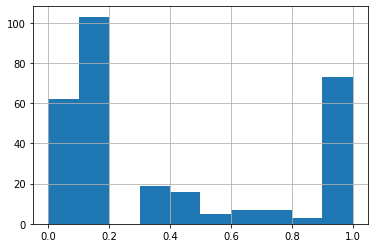

In [76]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [84]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [85]:
precision_score(Y_test, y_pred)

0.8513513513513513

In [86]:
recall_score(Y_test, y_pred)

0.525

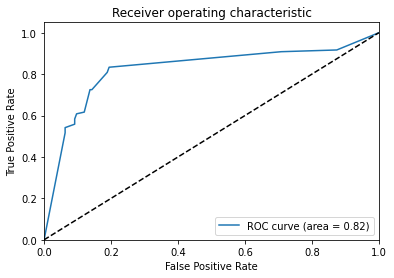

In [90]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")